In [1]:
setwd('/import/DB/workdir/cd40/')
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [2]:
sce = readRDS('../myleiod_7d.rds')

In [3]:
Idents(sce) = 'celltype'

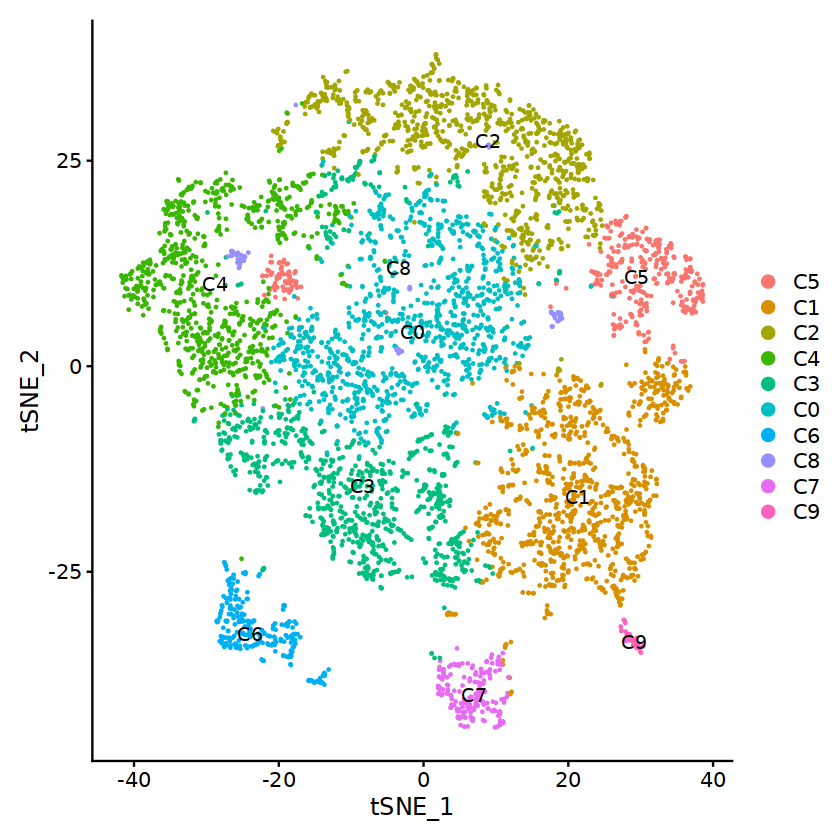

In [4]:
DimPlot(sce, reduction = "tsne",label = T)

In [5]:
Idents(sce) = 'seurat_clusters'

In [6]:
sce1 = subset(sce,idents = c(0,1,2,3,4,5,6,7))

In [7]:
table(sce1$celltype)


  C0   C1   C2   C3   C4   C5   C6   C7 
1042  965  895  875  790  368  241  185 

In [8]:
Idents(sce1)  ='seurat_clusters'

In [9]:
celltype = data.frame(
    cluster = c(0,1,2,3,4,5,6,7),
    celltype = c('MHCII TAM','Cd209a cDC2','classical mono','Sparc+ TAM','SPP1+ TAM','ISG+ TAM',
                'Proliferating cDC2','cDC1')
)

In [10]:
for(i in 1:nrow(celltype)){
  sce1@meta.data[which(sce1@meta.data$seurat_clusters == celltype$cluster[i]),'celltype'] <- celltype$celltype[i]}

In [11]:
table(sce1$celltype)


       Cd209a cDC2           ISG+ TAM          MHCII TAM Proliferating cDC2 
               965                368               1042                241 
         SPP1+ TAM         Sparc+ TAM               cDC1     classical mono 
               790                875                185                895 

In [12]:
Idents(sce1) = 'celltype'

In [14]:
sce1  =subset(sce1,idents = c('ISG+ TAM','MHCII TAM','SPP1+ TAM','Sparc+ TAM','classical mono'))

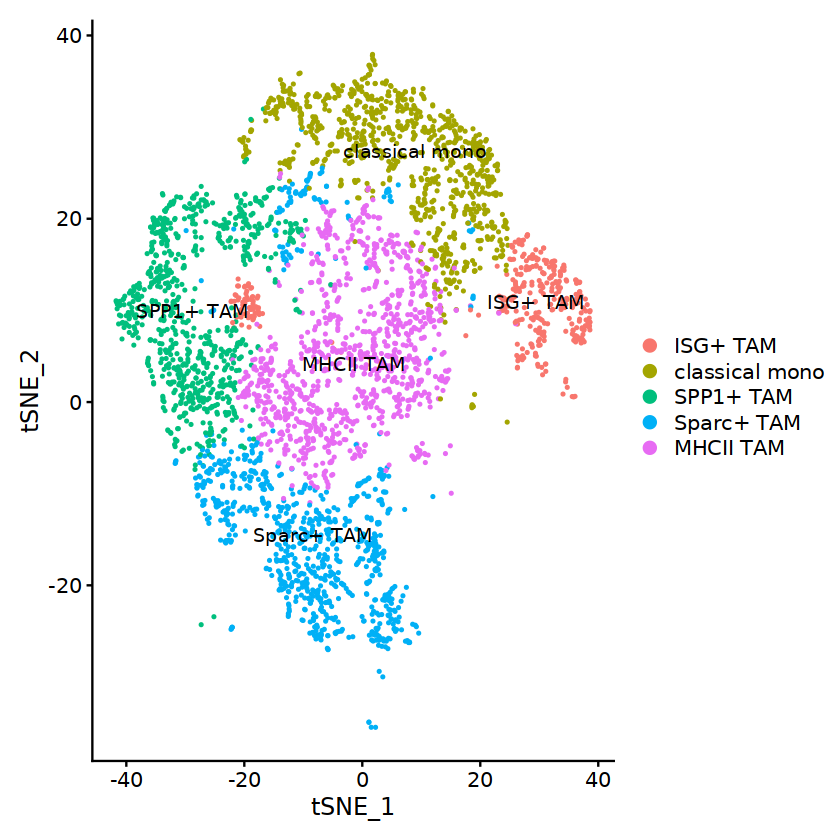

In [15]:
DimPlot(sce1, reduction = "tsne",label = T)

In [16]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


In [17]:
ggsave('d7.myleoid.remove.dc.umap.pdf',width = 6,height = 5)

In [18]:
getwd()

[1] "/import/DB/workdir/cd40"

In [19]:
Idents(sce1) = 'celltype'

In [20]:
sce.markers <- FindAllMarkers(object = sce1, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

write.csv(sce.markers,file = 'sce.markers.myleoid.re.dc.celltype.csv')

Calculating cluster ISG+ TAM

Calculating cluster classical mono

Calculating cluster SPP1+ TAM

Calculating cluster Sparc+ TAM

Calculating cluster MHCII TAM



In [21]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [22]:
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)

In [23]:
sce.markers['Mrc1',]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Mrc1,1.294201e-72,1.00723,0.529,0.209,4.442864e-68,SPP1+ TAM,Mrc1


In [24]:
library(ggplot2)

In [30]:
options(repr.plot.height = 7)

In [33]:
n1 = replace(unique(top5$gene),6:8,c('Cd14','Vcan','Ly6c2'))

In [34]:
n2 = replace(n1,11:12,c('Spp1','Gpnmb'))

In [31]:
# n1 = replace(unique(top5$gene),11:13,c('Cd14','Vcan','Ly6c2'))



# n3 = replace(n2,40,c('Xcr1'))

# n4 = replace(n3,19,c('Mrc1'))

# n4

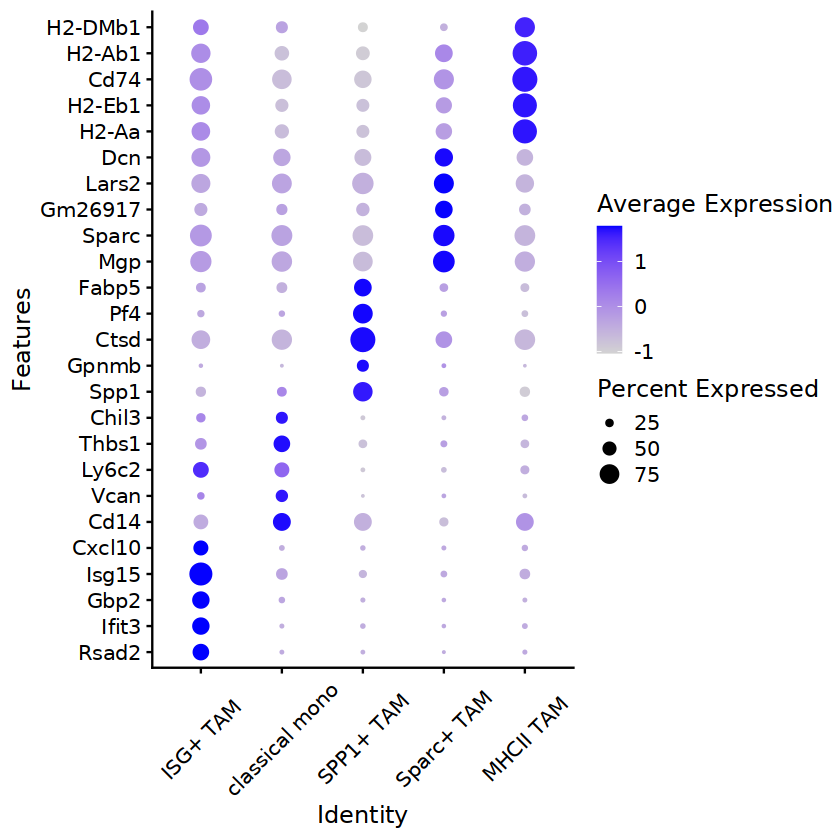

In [35]:
DotPlot(sce1, features = n2,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [36]:
ggsave('myleoid.marker.remove.dc.pdf',height = 7,width = 6)

In [37]:
getwd()

[1] "/import/DB/workdir/cd40"

In [38]:
# c7          Xcr1 cDC1
#  c6 Proliferating cDC2    Fcer1a  mki67 top2a
# c2   Classcal monocyte CD14, VCAN  LY6c2
#  c5  ISG15+ TAM   Ifitm3','Isg15','Cxcl10  
# c4  SPP1+ TAM   SPP1, GPNMB
# c1 cd209a  cd209a H2-DMb2
# c3   sparc+ TAM 
# c0 MHCII 

In [39]:
Idents(sce1)  = 'celltype'

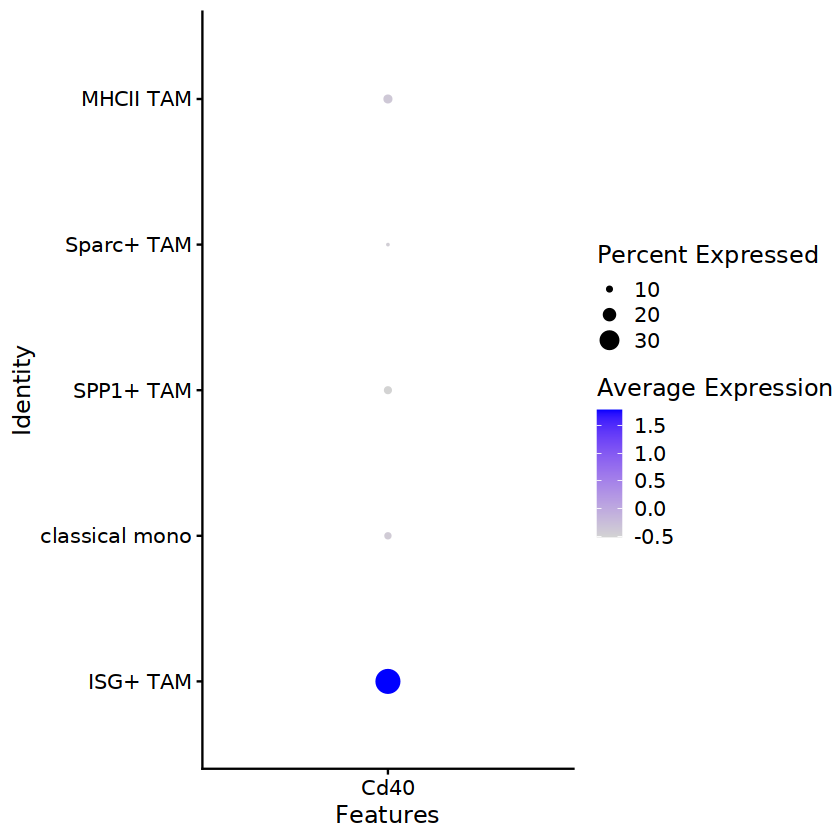

In [40]:
DotPlot(sce1,features = c('Cd40'))

In [41]:
saveRDS(sce1,file = 'mac.mono.removedc.res.rds')

In [42]:
scRNA = sce1


KO7d MI7d 
1724 2246 


      ISG+ TAM classical mono      SPP1+ TAM     Sparc+ TAM      MHCII TAM 
    0.09269521     0.22544081     0.19899244     0.22040302     0.26246851 

                
                 KO7d MI7d
  ISG+ TAM        141  227
  classical mono  383  512
  SPP1+ TAM       461  329
  Sparc+ TAM      233  642
  MHCII TAM       506  536

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."
Warning message:
"package 'ggalluvial' was built under R version 4.2.3"


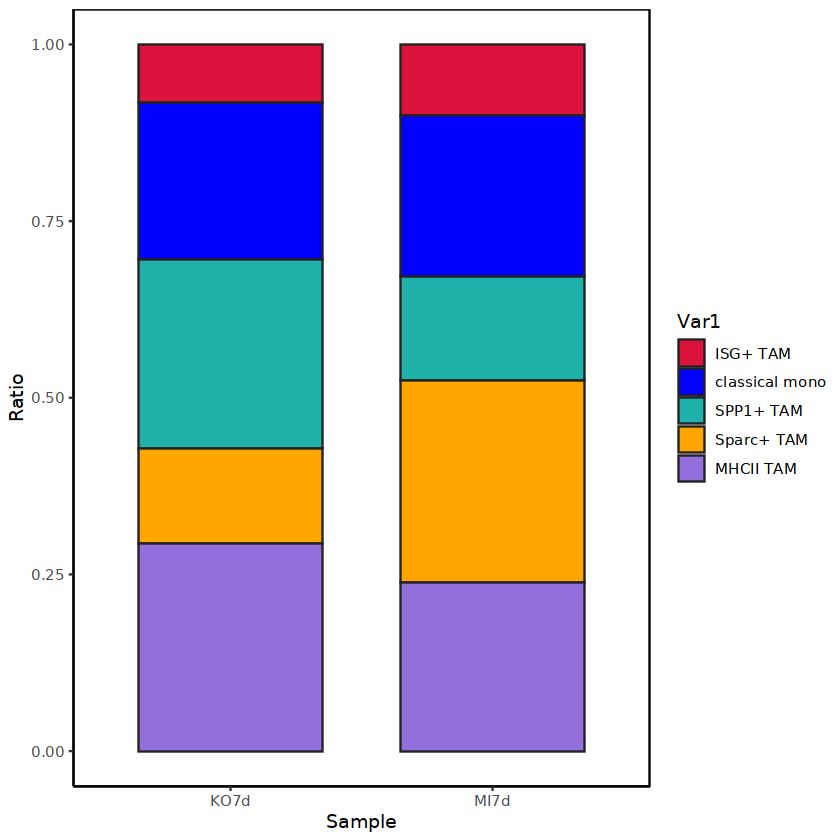

In [43]:
Idents(scRNA) ='celltype'

scedata = scRNA
table(scedata$orig.ident)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$orig.ident)#各组不同细胞群细胞数
Cellratio <- prop.table(table(Idents(scedata), scedata$orig.ident), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)

Cellratio$Var2 = factor(Cellratio$Var2,levels = c('KO3d',  'MI3d', 'KO7d', 'MI7d'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
ggplot(Cellratio) + 
  geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour)+
  theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)

In [44]:
options(repr.plot.width = 6,repr.plot.height = 6)

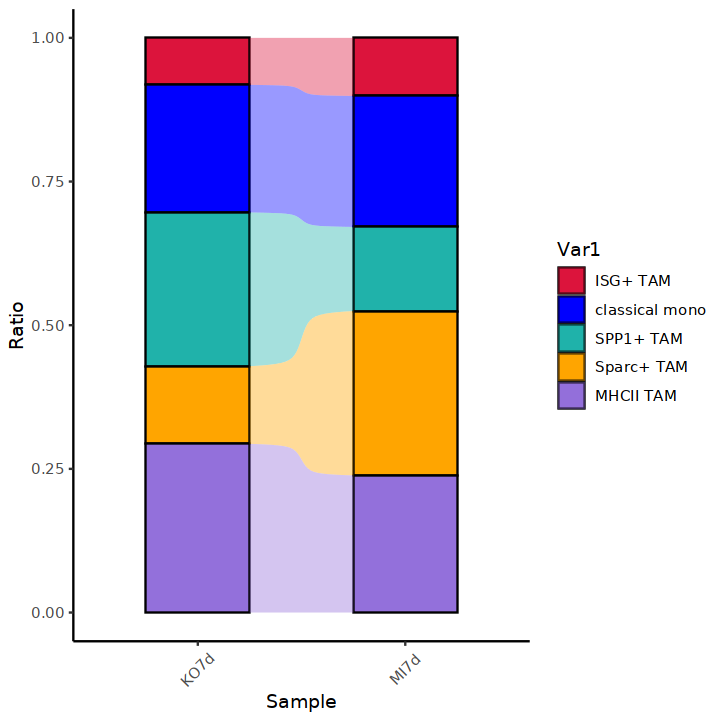

In [52]:
ggplot(Cellratio, aes(x =Var2, y= Freq, fill = Var1,
                  stratum=Var1, alluvium=Var1)) +
  geom_col(width = 0.5, color='black')+
  geom_flow(width=0.5,alpha=0.4, knot.pos=0.5)+ # 参数knot.pos设置为0.5使连接为曲线面积，就像常见的桑基图
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour) + theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [53]:
ggsave('mac.mono.removedc.radio.pdf',width = 5,height = 5)

In [46]:
SPP = subset(scRNA,idents = 'SPP1+ TAM')

In [47]:
Idents(SPP) ='orig.ident'

Warning message:
"Scaling data with a low number of groups may produce misleading results"


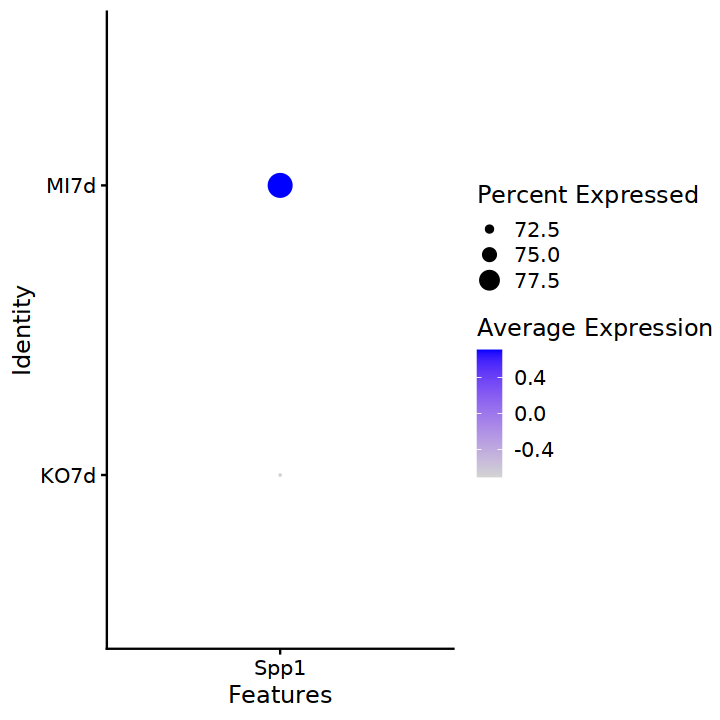

In [48]:
DotPlot(SPP,features = c('Spp1'))

In [49]:
Idents(scRNA) = 'celltype'

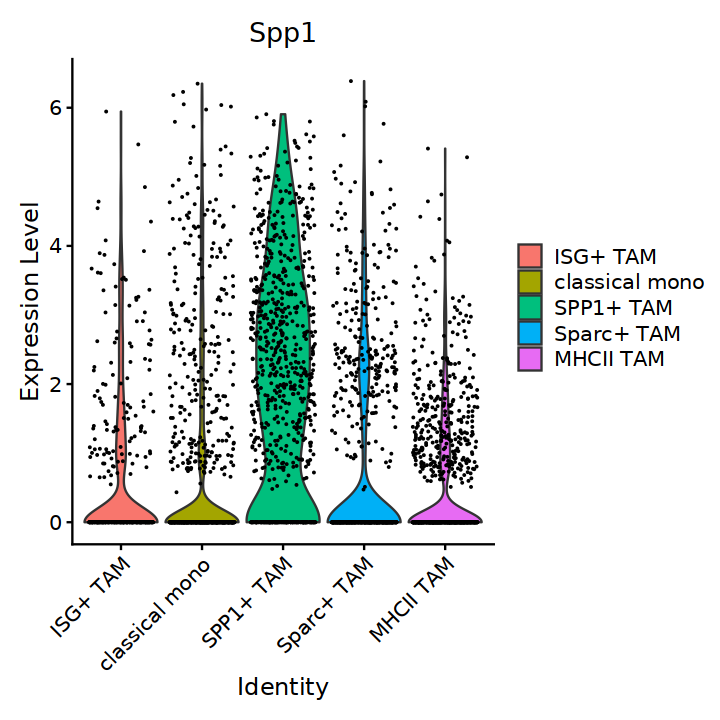

In [50]:
VlnPlot(scRNA,features = 'Spp1')

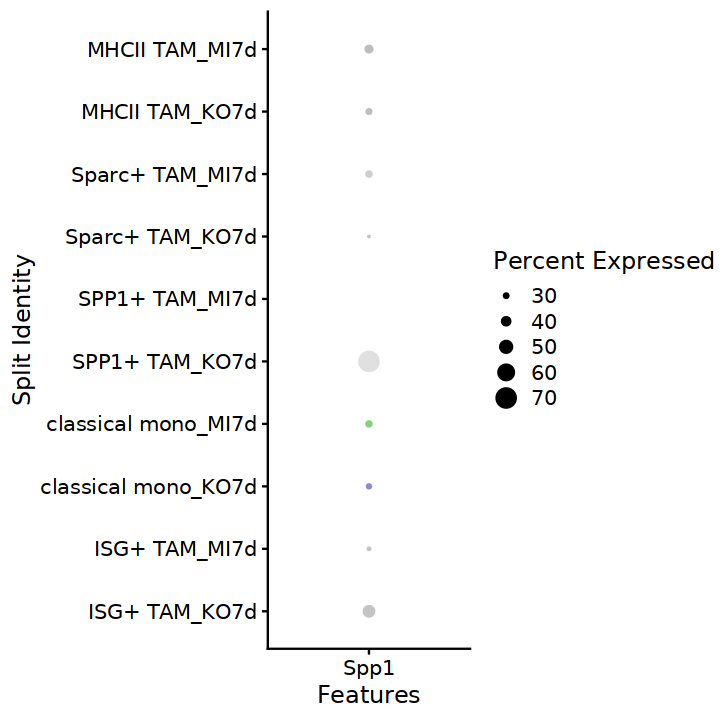

In [51]:
DotPlot(scRNA,features = c('Spp1'),split.by = 'orig.ident',cols = c("blue", "green"))